In [1]:
import sys
sys.path.append('/Users/pvrancx/Documents/Code/PyALE/src')

In [2]:
# %load ../src/util/RLGlueRunner.py
from multiprocessing import Process
import os
import rlglue.RLGlue as RLGlue
from rlglue.agent import AgentLoader as AgentLoader



def run_rlglue():
    os.system('rl_glue')
    
def run_ale(ale_path,game):
    ale_str = ''+ale_path + '/ale -display_screen false -game_controller rlglue -frame_skip 5 -disable_colour_averaging -use_environment_distribution '+ale_path +'/roms/'+game 
    os.system(ale_str)   

def run_experiment(maxsteps=100,numeps=1):
    taskSpec = RLGlue.RL_init()
    for ep in range(numeps):
        terminal=RLGlue.RL_episode(maxsteps)
        totalSteps=RLGlue.RL_num_steps()
        totalReward=RLGlue.RL_return()
        print "Episode "+str(ep)+"\t "+str(totalSteps)+ " steps \t" + str(totalReward) + " total reward\t " + str(terminal) + " natural end"
    RLGlue.RL_cleanup()
    
def run_agent(agent=None):
    AgentLoader.loadAgent(agent)
    
class RLGlueRunner(object):
    procs = []
    
    def __init__(self,host='127.0.0.1',port='4096',ale_path = '.',
                 game = 'space_invaders.bin',agent=None,num_eps=1,max_steps=100):
        self.host = host
        self.port = port
        self.ale_path = ale_path
        self.game = game
        self.agent = agent
        self.num_eps = num_eps
        self.max_steps = max_steps
        
    def create_procs(self):
        self.procs = []
        self.procs.append(Process(target=run_rlglue))
        self.procs.append(Process(target=run_ale,args=(self.ale_path,self.game)))
        self.procs.append(Process(target=run_experiment,args=(self.max_steps,self.num_eps)))
        self.procs.append(Process(target=run_agent,args=(self.agent,)))
        
    def run(self):
        os.environ['RLGLUE_HOST'] = self.host
        os.environ['RLGLUE_PORT'] = self.port
        self.create_procs()
        for p in self.procs:
            p.start()
            
    def is_finished(self):
        return reduce(lambda x,y: x and y,map(lambda x: not x.is_alive(),self.procs))
                        
    def terminate(self):
        for p in self.procs:
            p.terminate()
    

In [3]:
from agents.ALESarsaAgent import RAMALESarsaAgent

agent= RAMALESarsaAgent(alpha=0.5,lambda_=0.9,gamma=0.999,agent_id=2)
runner= RLGlueRunner(ale_path ='~/Documents/Projects/ALE/ale4',agent=agent,num_eps=10,max_steps=2000)
runner.run()

In [9]:
runner.is_finished()

Episode 6	 416 steps 	15.0 total reward	 1 natural end
Episode 7	 708 steps 	355.0 total reward	 1 natural end


False

In [17]:
runner.terminate()

In [5]:
import cPickle as pickle
with open('SARSA_log.0','rb') as f:
    log = pickle.load(f)


In [6]:
print log

{'reward': [440.0, 180.0], 'steps': [593, 491]}


In [11]:
ls

BackgroundLearning.ipynb  SARSA_log.0               Untitled-Copy1.ipynb      Untitled1.ipynb           frames
LoggingFrames.ipynb       Sarsa.ipynb               Untitled.ipynb            data/                     state/


In [6]:
import cPickle as pickle
with open('../src/SARSA_log.None','rb') as f:
    d = pickle.load(f)

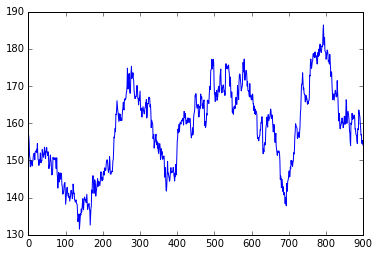

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def avg_rew(data,w):
    return np.convolve(data,np.ones(w),mode='valid')/float(w)

plt.plot(avg_rew(d['reward'],100))

In [5]:
1024*1024+1024

Episode 744	 2 steps 	0.0 total reward	 33728 natural end
Episode 745	 2 steps 	0.0 total reward	 33728 natural end
Episode 746	 2 steps 	0.0 total reward	 33728 natural end
Episode 747	 2 steps 	0.0 total reward	 33728 natural end
Episode 748	 2 steps 	0.0 total reward	 33728 natural end
Episode 749	 2 steps 	0.0 total reward	 33728 natural end
Episode 750	 2 steps 	0.0 total reward	 33728 natural end
Episode 751	 2 steps 	0.0 total reward	 33728 natural end
Episode 752	 2 steps 	0.0 total reward	 33728 natural end
Episode 753	 2 steps 	0.0 total reward	 33728 natural end
Episode 754	 2 steps 	0.0 total reward	 33728 natural end
Episode 755	 2 steps 	0.0 total reward	 33728 natural end
Episode 756	 2 steps 	0.0 total reward	 33728 natural end
Episode 757	 2 steps 	0.0 total reward	 33728 natural end
Episode 758	 2 steps 	0.0 total reward	 33728 natural end
Episode 759	 2 steps 	0.0 total reward	 33728 natural end
Episode 760	 2 steps 	0.0 total reward	 33728 natural end
Episode 761	 2

1049600